In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 
#0 indicates-Tumor 1 indicates-normal

OneHotEncoder()

In [3]:
data = []   #data list for storing image data
paths = []  #paths list for storing paths of all images
result = [] #result list for storing one hot encoded form of target class whether normal or tumor

In [5]:
# This cell updates result list for images with tumor
for r, d, f in os.walk('/content/drive/MyDrive/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [6]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk('/content/drive/MyDrive/brain_tumor_dataset/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [7]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [8]:
result = np.array(result)
result = result.reshape(139,2)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [10]:
#Building CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8256      
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        1

In [11]:
x_train.shape,y_train.shape

((111, 128, 128, 3), (111, 2))

In [12]:
tumor = model.fit(x_train, y_train, epochs = 10, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/10
3/3 [==============================] - 14s 4s/step - loss: 22.2006 - val_loss: 93.4475
Epoch 2/10
3/3 [==============================] - 8s 3s/step - loss: 12.8498 - val_loss: 32.9944
Epoch 3/10
3/3 [==============================] - 10s 4s/step - loss: 6.4719 - val_loss: 11.5193
Epoch 4/10
3/3 [==============================] - 12s 5s/step - loss: 1.6032 - val_loss: 4.5080
Epoch 5/10
3/3 [==============================] - 9s 3s/step - loss: 1.5028 - val_loss: 2.7663
Epoch 6/10
3/3 [==============================] - 10s 3s/step - loss: 0.7917 - val_loss: 2.8118
Epoch 7/10
3/3 [==============================] - 10s 3s/step - loss: 0.1955 - val_loss: 5.3587
Epoch 8/10
3/3 [==============================] - 9s 3s/step - loss: 0.3196 - val_loss: 5.4045
Epoch 9/10
3/3 [==============================] - 11s 4s/step - loss: 0.2400 - val_loss: 3.6920
Epoch 10/10
3/3 [==============================] - 10s 4s/step - loss: 0.0853 - val_loss: 2.1047


It is a Tumor


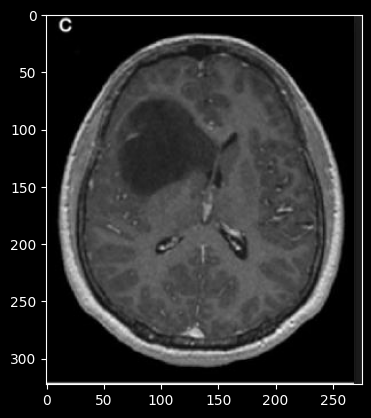

In [17]:
#checking our model with an image
def names(number):
    if number==0:
        return 'It is a Tumor'
    else:
        return 'not a tumor'
from matplotlib.pyplot import imshow
img = Image.open('/content/drive/MyDrive/brain_tumor_dataset/yes/Y98.JPG')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

not a tumor


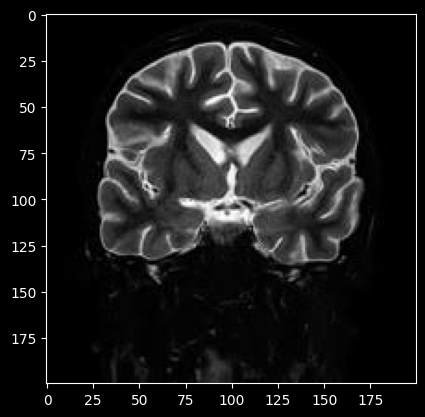

In [18]:
from matplotlib.pyplot import imshow
img = Image.open('/content/drive/MyDrive/brain_tumor_dataset/no/19 no.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))